In [1]:
# Data Analytics I:
# https://www.youtube.com/watch?v=QcPycBZomac
# Show linear regression technique for user values.
# Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.
# The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Load your dataset (update filename as needed)
df = pd.read_csv(r'C:\CODE\ds\DS\DS\PR_EXAM_DATASET\HousingData.csv')

# Show first few rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Convert to numeric and handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Separate features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [6]:
print("Intercept:", model.intercept_)
print("Coefficients:\n", pd.Series(model.coef_, index=X.columns))

print("\nR² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Intercept: 33.65240504056566
Coefficients:
 CRIM       -0.112187
ZN          0.042440
INDUS       0.025673
CHAS        1.983837
NOX       -17.079257
RM          4.258091
AGE        -0.021741
DIS        -1.424189
RAD         0.235588
TAX        -0.011997
PTRATIO    -0.975835
B           0.009594
LSTAT      -0.388620
dtype: float64

R² Score: 0.627084994167318
Mean Squared Error: 31.454047664950963


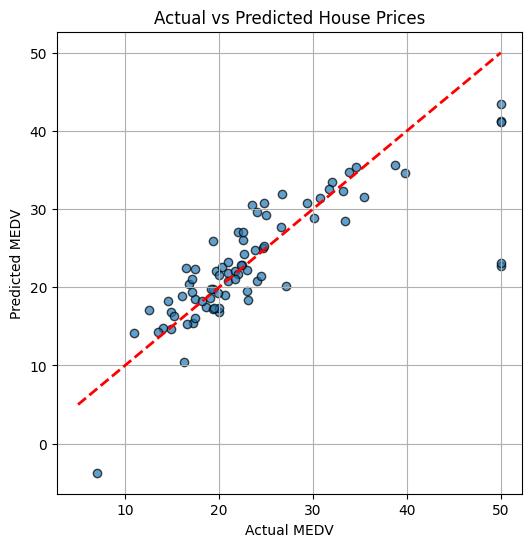

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
